In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
tau_dfs = os.listdir('Q:\\Personal\\Irina\\projects\\isttc\\results\\allen_mice\\test_full_split\\')
#tau_dfs

pearsonr_avg_trial_med = []
sttc_avg_trial_med = []
sttc_concat_trial_med = []

for k in tau_dfs:
    tau_df = pd.read_pickle('Q:\\Personal\\Irina\\projects\\isttc\\results\\allen_mice\\test_full_split\\' + k)
    pearsonr_avg_trial_med.append(np.nanmedian(tau_df['tau_pearsonr_avg']))
    sttc_avg_trial_med.append(np.nanmedian(tau_df['tau_sttc_avg']))
    sttc_concat_trial_med.append(np.nanmedian(tau_df['tau_sttc_concat']))

In [8]:
tau_5methods_df = pd.DataFrame(np.vstack((np.linspace(0,49, 50).astype(int),  
                                         pearsonr_avg_trial_med, sttc_avg_trial_med, sttc_concat_trial_med)).T, 
                  columns=['signal_id', 'tau_pearsonr_avg', 'tau_sttc_avg', 'tau_sttc_concat'])

In [16]:
tau_5methods_df.describe()

,signal_id,tau_pearsonr_avg,tau_sttc_avg,tau_sttc_concat
count,50.00000,50.000000,50.000000,5.000000e+01
mean,24.50000,4059.109819,3610.615254,1.153660e+06
std,14.57738,6113.829159,5311.045130,8.138148e+06
min,0.00000,125.261196,124.146408,1.197635e+02
25%,12.25000,542.186819,605.442124,4.351554e+02
50%,24.50000,1328.458246,1458.986261,1.164603e+03
75%,36.75000,4668.387449,4298.049556,3.379140e+03
max,49.00000,31505.656988,26336.275247,5.754815e+07


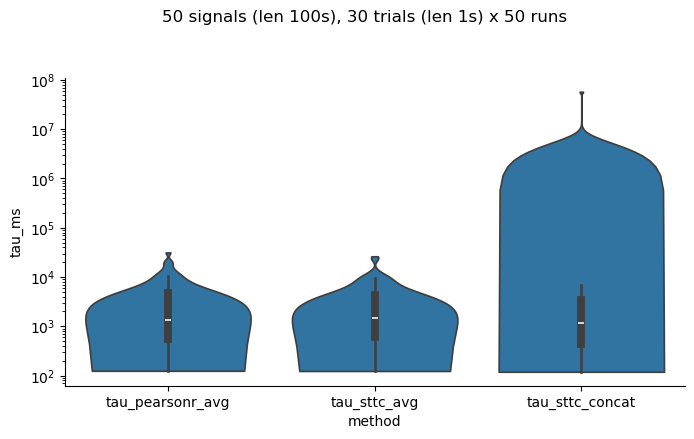

In [15]:
tau_5methods_df_long = pd.melt(tau_5methods_df, id_vars=['signal_id'], value_vars=[
                                                                                   'tau_pearsonr_avg', 'tau_sttc_avg', 'tau_sttc_concat'], 
                  value_name='tau_ms', var_name='method')

fig, axes = plt.subplots(1,1, figsize=(8,4))

sns.violinplot(ax=axes, x='method', y='tau_ms', data=tau_5methods_df_long, cut=0,  density_norm='width')
#axes.axhline(y=100, color='k')
axes.set_yscale('log')


fig.suptitle('50 signals (len 100s), 30 trials (len 1s) x 50 runs', y=1.05)

sns.despine()

# fig.savefig('Q:\\Personal\\Irina\\projects\\isttc\\results\\synthetic_data\\test_full_split_parametric\\five_methods\\trial_tau_figs\\' 
#             + 'taus' + str(i) + '.png' , bbox_inches='tight')
# fig.savefig('D:\\isttc\\results\\synthetic_data\\test_full_split_parametric\\five_methods_50\\' 
#             + 'taus.png' , bbox_inches='tight')